In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/911_metadata.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,id,link,title,date,state,civilian_initiated,deaths,potential_death,false_alarm,description,file_name
0,1,https://web.archive.org/web/20150417085342/htt...,North Hollywood bank robbery,2/97,California,0.0,2.0,1.0,0.0,– The unforgettable collection of radio loggin...,call_1.mp3
1,2,https://web.archive.org/web/20150417085342/htt...,Detroit Child’s 911 Call – audio,2/06,Michigan,1.0,1.0,1.0,0.0,– In Feb. 2006 5 year-old Robert Turner called...,call_2.mp3
2,3,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Fire Tapes,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Fire Tapes #2,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Tape Archive,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import re

def label_title(row):
    # Define a list of keywords and their variations
    keywords = ['accident', 'prank', 'fake', 'date', 'Non-emerg']

    # Create a regex pattern to match any form of the keywords
    pattern = r'\b(?:' + '|'.join(re.escape(word) for word in keywords) + r')\b'

    # Check if the title contains the pattern or if false_alarm is 1
    if re.search(pattern, row.title, flags=re.IGNORECASE) or row.false_alarm == 1:
        return 'prank'
    return 'genuine'

# Apply the label_title function to create a new 'label' column
df['label'] = df.apply(label_title, axis=1)

In [ ]:
df

,id,link,title,date,state,civilian_initiated,deaths,potential_death,false_alarm,description,file_name,label
0,1,https://web.archive.org/web/20150417085342/htt...,North Hollywood bank robbery,2/97,California,0.0,2.0,1.0,0.0,– The unforgettable collection of radio loggin...,call_1.mp3,genuine
1,2,https://web.archive.org/web/20150417085342/htt...,Detroit Child’s 911 Call – audio,2/06,Michigan,1.0,1.0,1.0,0.0,– In Feb. 2006 5 year-old Robert Turner called...,call_2.mp3,genuine
2,3,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Fire Tapes,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,genuine
3,4,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Fire Tapes #2,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,genuine
4,5,https://web.archive.org/web/20150417085342/htt...,Sept. 11th Tape Archive,9/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,genuine
...,...,...,...,...,...,...,...,...,...,...,...,...
737,739,https://web.archive.org/web/20150417085349/htt...,Prank call,8/10,California,1.0,0.0,0.0,1.0,– In August 2010 a Los Angeles County sheriff’...,call_739.mp3,prank
738,740,https://web.archive.org/web/20150417085349/htt...,Call from murder suspect,8/10,California,1.0,0.0,1.0,0.0,– In August 2010 the suspect in the murder of ...,call_740.mp3,genuine
739,741,https://web.archive.org/web/20150417085349/htt...,Shoot-out,8/10,Georgia,1.0,2.0,1.0,0.0,– In August 2010 an ex-boyfriend arrived at a ...,call_741.mp3,genuine
740,742,https://web.archive.org/web/20150417085349/htt...,Murders,8/10,Arizona,1.0,6.0,1.0,0.0,– In Aug. 2010 a man invaded the Lake Havasu (...,call_742.mp3,genuine


In [ ]:
# Specify the columns you want to include in the new DataFrame
selected_columns = ['id','file_name', 'title', 'state', 'potential_death', 'false_alarm', 'label']

# Create a new DataFrame with the selected columns
new_df = df[selected_columns]

In [ ]:
new_df

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
2,3,NaN,Sept. 11th Fire Tapes,NaN,NaN,NaN,genuine
3,4,NaN,Sept. 11th Fire Tapes #2,NaN,NaN,NaN,genuine
4,5,NaN,Sept. 11th Tape Archive,NaN,NaN,NaN,genuine
...,...,...,...,...,...,...,...
737,739,call_739.mp3,Prank call,California,0.0,1.0,prank
738,740,call_740.mp3,Call from murder suspect,California,1.0,0.0,genuine
739,741,call_741.mp3,Shoot-out,Georgia,1.0,0.0,genuine
740,742,call_742.mp3,Murders,Arizona,1.0,0.0,genuine


we found that audio file 506 is currupted while trimming the audio, hence we are removing that row from the metadata

In [ ]:
#506

In [ ]:
new_df[new_df['file_name'] == 'call_506.mp3']

,id,file_name,title,state,potential_death,false_alarm,label
505,506,call_506.mp3,Child Kidnapped,Florida,1.0,0.0,genuine


In [ ]:
new_df = new_df[new_df['file_name'] != 'call_506.mp3']

In [ ]:
new_df[new_df['file_name'] == 'call_506.mp3']

,id,file_name,title,state,potential_death,false_alarm,label


In [ ]:
new_df

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
2,3,NaN,Sept. 11th Fire Tapes,NaN,NaN,NaN,genuine
3,4,NaN,Sept. 11th Fire Tapes #2,NaN,NaN,NaN,genuine
4,5,NaN,Sept. 11th Tape Archive,NaN,NaN,NaN,genuine
...,...,...,...,...,...,...,...
737,739,call_739.mp3,Prank call,California,0.0,1.0,prank
738,740,call_740.mp3,Call from murder suspect,California,1.0,0.0,genuine
739,741,call_741.mp3,Shoot-out,Georgia,1.0,0.0,genuine
740,742,call_742.mp3,Murders,Arizona,1.0,0.0,genuine


In [ ]:
new_df['file_name'].dropna(inplace=True)

<ipython-input-15-6e475c9d787e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['file_name'].dropna(inplace=True)


In [ ]:
new_df

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
2,3,NaN,Sept. 11th Fire Tapes,NaN,NaN,NaN,genuine
3,4,NaN,Sept. 11th Fire Tapes #2,NaN,NaN,NaN,genuine
4,5,NaN,Sept. 11th Tape Archive,NaN,NaN,NaN,genuine
...,...,...,...,...,...,...,...
737,739,call_739.mp3,Prank call,California,0.0,1.0,prank
738,740,call_740.mp3,Call from murder suspect,California,1.0,0.0,genuine
739,741,call_741.mp3,Shoot-out,Georgia,1.0,0.0,genuine
740,742,call_742.mp3,Murders,Arizona,1.0,0.0,genuine


In [ ]:
print(new_df['file_name'].isna().sum())


36


In [ ]:
new_df['file_name'] = new_df['file_name'].str.strip()
new_df['file_name'].dropna(inplace=True)

<ipython-input-19-055720f8ace0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['file_name'] = new_df['file_name'].str.strip()
<ipython-input-19-055720f8ace0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['file_name'].dropna(inplace=True)


In [ ]:
print(new_df['file_name'].isna().sum())

36


In [ ]:
import numpy as np

In [ ]:
new_df['file_name'].replace('', np.nan, inplace=True)  # Replace empty strings with NaN
new_df.dropna(subset=['file_name'], inplace=True)  # Drop rows with NaN in 'file_name' column

<ipython-input-22-16a60716f145>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['file_name'].replace('', np.nan, inplace=True)  # Replace empty strings with NaN
<ipython-input-22-16a60716f145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=['file_name'], inplace=True)  # Drop rows with NaN in 'file_name' column


In [ ]:
new_df

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
7,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine
8,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank
9,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine
...,...,...,...,...,...,...,...
737,739,call_739.mp3,Prank call,California,0.0,1.0,prank
738,740,call_740.mp3,Call from murder suspect,California,1.0,0.0,genuine
739,741,call_741.mp3,Shoot-out,Georgia,1.0,0.0,genuine
740,742,call_742.mp3,Murders,Arizona,1.0,0.0,genuine


In [ ]:
print(new_df['file_name'].isna().sum())

0


In [ ]:
new_df.to_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/data.csv', index=False)

In [ ]:
!pip install librosa

In [ ]:
!pip install soundfile

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
import librosa
import pandas as pd
import librosa
import seaborn as sns
import glob

In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd

# Function to extract MFCC features
def mfcc_extractor(audio):
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Function to extract zero-crossing rate features
def zero_extractor(audio):
    zeros = librosa.feature.zero_crossing_rate(audio, frame_length=2048, hop_length=512, center=True)
    zeros_scaled_features = np.mean(zeros.T, axis=0)
    return zeros_scaled_features

# Function to extract RMS features
def rms_extractor(audio):
    rms = librosa.feature.rms(y=audio)
    rms_scaled_features = np.mean(rms.T, axis=0)
    return rms_scaled_features

# Function to extract spectral centroid features
def spectral_centroid_extractor(audio):
    sc = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
    sc_scaled_features = np.mean(sc.T, axis=0)
    return sc_scaled_features

# Function to extract spectral bandwidth features
def spectral_bandwidth_extractor(audio):
    sb = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
    sb_scaled_features = np.mean(sb.T, axis=0)
    return sb_scaled_features

# Function to extract spectral contrast features
def spectral_contrast_extractor(audio):
    sco = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
    sco_scaled_features = np.mean(sco.T, axis=0)
    return sco_scaled_features

# Function to extract polynomial features
def polynomial_extractor(audio):
    poly = librosa.feature.poly_features(y=audio, sr=sample_rate, order=2)
    poly_scaled_features = np.mean(poly.T, axis=0)
    return poly_scaled_features

# Function to recursively search for vocal audio files in subdirectories
def process_subdirectories(root_directory):
    df = pd.DataFrame(columns=["File_Path", "mfcc", "zero_features", "rms_features", "sc_features", "sb_features", "sco_features", "poly_features"])

    for root, _, files in os.walk(root_directory):
        for file in files:
            if file.endswith(".wav"):
                vocal_audio_file_path = os.path.join(root, file)
                vocal_audio, sample_rate = librosa.load(vocal_audio_file_path)
                mfcc = mfcc_extractor(vocal_audio)
                zero = zero_extractor(vocal_audio)
                rms = rms_extractor(vocal_audio)
                spectral_centroid = spectral_centroid_extractor(vocal_audio)
                spectral_bandwidth = spectral_bandwidth_extractor(vocal_audio)
                spectral_contrast = spectral_contrast_extractor(vocal_audio)
                polynomial = polynomial_extractor(vocal_audio)
                df = df.append({"File_Path": vocal_audio_file_path, "mfcc": mfcc, "zero_features": zero,
                                "rms_features": rms, "sc_features": spectral_centroid, "sb_features": spectral_bandwidth,
                                "sco_features": spectral_contrast, "poly_features": polynomial}, ignore_index=True)

    return df

# Directory where your vocal audio files are stored
vocals_directory = "/content/drive/MyDrive/EDA_DPA/Calls_Audio/911_vocals"

In [ ]:
result_df = process_subdirectories(vocals_directory)

In [ ]:
data = [mfcc_features, zero_features, rms_features, sc_features, sb_features, sco_features, poly_features]

In [ ]:
data

[[array([-308.79172   ,  136.13489   ,  -37.25976   ,  -45.135983  ,
            0.8721982 ,  -18.139322  ,  -29.317186  ,   -6.7940736 ,
           -8.344071  ,  -16.113241  ,   -2.1800733 ,   -0.52102697,
           -9.670274  ,   -0.65519756,    5.7951484 ,   -3.1368155 ,
           -1.1346129 ,    8.316869  ,    4.861743  ,    0.78616405,
            4.7505593 ,    4.86035   ,    3.0777776 ,    5.119557  ,
            4.5548244 ,    2.7972736 ,    4.137673  ,    3.4104545 ,
            2.1985157 ,    4.700708  ,    4.210797  ,    0.8558595 ,
            2.6370034 ,    4.9322195 ,    2.8593576 ,    3.0214374 ,
            4.861391  ,    3.1517284 ,    2.7514217 ,    4.9195976 ],
        dtype=float32),
  array([-3.2171231e+02,  1.2248372e+02, -3.5463867e+00, -1.3598504e+01,
          1.1574232e+01, -6.3930082e+00, -2.2454294e+01, -1.6145927e+01,
         -1.6736267e+01, -1.9837421e+01, -1.1987168e+01, -1.5165107e+00,
          3.1918287e+00, -4.4242665e-01, -5.8188729e+00, -9.903788

In [ ]:
extracted_features_df = pd.DataFrame((data, columns=['mfcc', 'zero crossing rate', 'root mean square', 'spectral centroid', 'spectral bandwidth', 'spectral contrast', 'polynomial']).T)

SyntaxError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Assuming you already have mfcc_features, zero_features, rms_features, etc. defined
data = [mfcc_features, zero_features, rms_features, sc_features, sb_features, sco_features, poly_features]

# Create a DataFrame and transpose it while specifying column names
column_names = ['mfcc', 'zero crossing rate', 'root mean square', 'spectral centroid', 'spectral bandwidth', 'spectral contrast', 'polynomial']
extracted_features_df = pd.DataFrame(data, columns=column_names).T

# Display the DataFrame
print(extracted_features_df)


ValueError: ignored

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,"[-308.79172, 136.13489, -37.25976, -45.135983,...","[-321.7123, 122.48372, -3.5463867, -13.598504,...","[-223.01364, 187.9587, -88.117, 19.611095, 21....","[-312.2028, 153.9286, -83.03282, 5.9746904, 17...","[-314.16467, 148.37148, -19.053394, -30.385885...","[-309.43085, 163.7727, -52.11738, -9.824571, 9...","[-257.7906, 172.92273, -89.44078, -1.6080616, ...","[-228.63243, 148.43227, -84.14093, 31.874006, ...","[-255.8766, 173.98122, -67.597336, -15.8120165...","[-321.38614, 156.2039, -57.852604, 2.6698148, ...",...,"[-335.61407, 150.20804, -27.16153, -42.901783,...","[-244.22899, 157.68542, -72.70338, 2.4565578, ...","[-355.533, 157.00493, -88.50907, -9.60178, 28....","[-298.70096, 162.08371, -51.928852, -6.0806603...","[-268.4446, 173.86824, -50.849594, -15.92656, ...","[-303.99353, 145.05466, -60.83814, 0.88218766,...","[-172.50201, 150.46594, -61.13828, 14.172707, ...","[-183.63426, 183.16046, -76.204575, 0.26238817...","[-261.0968, 139.39363, -49.304226, -5.2032876,...","[-107.58629, 137.52837, -53.03281, -14.308361,..."
1,[0.09250633783015673],[0.054411235608552634],[0.09692760739164087],[0.13310964483963816],[0.09918827021454141],[0.08633401752042741],[0.0963204682057856],[0.11847046352230484],[0.08934668195505999],[0.09939101187554537],...,[0.0926003470878483],[0.1144020860040151],[0.14108739327351005],[0.09887544141834366],[0.07906295602281772],[0.12671729876160992],[0.07633598965387964],[0.11041240108569847],[0.11246105465726587],[0.10741611161837268]
2,[0.09181289],[0.13053523],[0.10465541],[0.028446283],[0.081535585],[0.062123537],[0.08152244],[0.055492632],[0.15240012],[0.03434644],...,[0.055168614],[0.0863823],[0.028677037],[0.09383477],[0.08625074],[0.059933443],[0.20928289],[0.1511083],[0.07461173],[0.23930305]
3,[1122.137193841586],[964.7291440669569],[1355.3585633245118],[1532.378745507396],[1110.6987471087214],[1278.1109374356581],[1335.4085443639808],[1570.7063894205155],[1195.3794961192123],[1279.6545184455938],...,[1060.765875180241],[1402.1157840391538],[1616.681024533009],[1265.8204762861146],[1107.2508324303415],[1463.2620779294884],[1276.8209750956066],[1357.5604942061802],[1352.9141452575661],[1611.4680031539026]
4,[677.4905710436655],[1204.4383094465418],[998.274180526129],[973.8426856698786],[655.0586933830866],[1084.5502264753209],[884.8110562874301],[1131.8915778720673],[753.6182554922564],[943.8921377781],...,[604.2927200079905],[887.9534980153124],[933.4188407884948],[856.7296362769049],[770.7601171153777],[956.732241424977],[1057.7964766200475],[903.4758047779026],[875.7971438585491],[1542.7393770845451]
5,"[32.76261949193272, 22.184714248069206, 22.486...","[18.467119826666842, 19.546451908793433, 24.13...","[13.538530665653242, 13.690407090665277, 16.19...","[18.49698190152447, 14.91091855429213, 17.5837...","[23.605373804436773, 19.19783024051368, 23.854...","[12.333407069138575, 13.019992501901175, 16.79...","[27.09701694623746, 15.956035258281052, 18.439...","[11.950465982540482, 11.674979465383846, 14.35...","[17.854619869048985, 14.277847328809653, 17.82...","[18.12214554336205, 14.545114090155023, 16.879...",...,"[25.586682319686528, 15.41408106601236, 20.657...","[11.308826380934324, 14.077169318718525, 16.97...","[11.079897660461615, 13.696802020104203, 16.23...","[23.18617979331472, 14.965216195549175, 18.076...","[11.24336381712898, 15.552680368341017, 18.376...","[16.91834171501042, 12.596302712690179, 14.805...","[14.664955004065432, 13.718077564497248, 17.02...","[13.00942937164746, 12.712119601826682, 16.425...","[12.256644790513171, 13.532146452156528, 16.65...","[11.598323191021885, 13.466801080170834, 16.22..."
6,"[5.594755766442662e-08, -0.000832309435173083,...","[8.763465108413093e-08, -0.0012308401339950767...","[8.346468330852969e-08, -0.0012672516404149533...","[1.9776181842371532e-08, -0.000313261208476648...","[5.963548956918065e-08, -0.0008673268913837677...","[4.818625179829015e-08, -0.00071406841

In [ ]:
data=data.T

In [ ]:
data

,0,1,2,3,4,5,6
0,"[-308.79172, 136.13489, -37.25976, -45.135983,...",[0.09250633783015673],[0.09181289],[1122.137193841586],[677.4905710436655],"[32.76261949193272, 22.184714248069206, 22.486...","[5.594755766442662e-08, -0.000832309435173083,..."
1,"[-321.7123, 122.48372, -3.5463867, -13.598504,...",[0.054411235608552634],[0.13053523],[964.7291440669569],[1204.4383094465418],"[18.467119826666842, 19.546451908793433, 24.13...","[8.763465108413093e-08, -0.0012308401339950767..."
2,"[-223.01364, 187.9587, -88.117, 19.611095, 21....",[0.09692760739164087],[0.10465541],[1355.3585633245118],[998.274180526129],"[13.538530665653242, 13.690407090665277, 16.19...","[8.346468330852969e-08, -0.0012672516404149533..."
3,"[-312.2028, 153.9286, -83.03282, 5.9746904, 17...",[0.13310964483963816],[0.028446283],[1532.378745507396],[973.8426856698786],"[18.49698190152447, 14.91091855429213, 17.5837...","[1.9776181842371532e-08, -0.000313261208476648..."
4,"[-314.16467, 148.37148, -19.053394, -30.385885...",[0.09918827021454141],[0.081535585],[1110.6987471087214],[655.0586933830866],"[23.605373804436773, 19.19783024051368, 23.854...","[5.963548956918065e-08, -0.0008673268913837677..."
...,...,...,...,...,...,...,...
701,"[-303.99353, 145.05466, -60.83814, 0.88218766,...",[0.12671729876160992],[0.059933443],[1463.2620779294884],[956.732241424977],"[16.91834171501042, 12.596302712690179, 14.805...","[4.370230006016049e-08, -0.0006575253230483412..."
702,"[-172.50201, 150.46594, -61.13828, 14.172707, ...",[0.07633598965387964],[0.20928289],[1276.8209750956066],[1057.7964766200475],"[14.664955004065432, 13.718077564497248, 17.02...","[1.4795369454644274e-07, -0.002187913190515122..."
703,"[-183.63426, 183.16046, -76.204575, 0.26238817...",[0.11041240108569847],[0.1511083],[1357.5604942061802],[903.4758047779026],"[13.00942937164746, 12.712119601826682, 16.425...","[1.230940513632395e-07, -0.0018783613004840498..."
704,"[-261.0968, 139.39363, -49.304226, -5.2032876,...",[0.11246105465726587],[0.07461173],[1352.9141452575661],[875.7971438585491],"[12.256644790513171, 13.532146452156528, 16.65...","[5.798001214212884e-08, -0.0008740479998692348..."


In [ ]:
data.rename(columns={0: 'mfcc'}, inplace=True)

In [ ]:
#mfcc_features, zero_features, rms_features, sc_features, sb_features, sco_features, poly_features
data.rename(columns={1: 'zero_features'}, inplace=True)
data.rename(columns={2: 'rms_features'}, inplace=True)
data.rename(columns={3: 'sc_features'}, inplace=True)
data.rename(columns={4: 'sb_features'}, inplace=True)
data.rename(columns={5: 'sco_features'}, inplace=True)
data.rename(columns={6: 'poly_features'}, inplace=True)

In [ ]:
data

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,"[-308.79172, 136.13489, -37.25976, -45.135983,...",[0.09250633783015673],[0.09181289],[1122.137193841586],[677.4905710436655],"[32.76261949193272, 22.184714248069206, 22.486...","[5.594755766442662e-08, -0.000832309435173083,..."
1,"[-321.7123, 122.48372, -3.5463867, -13.598504,...",[0.054411235608552634],[0.13053523],[964.7291440669569],[1204.4383094465418],"[18.467119826666842, 19.546451908793433, 24.13...","[8.763465108413093e-08, -0.0012308401339950767..."
2,"[-223.01364, 187.9587, -88.117, 19.611095, 21....",[0.09692760739164087],[0.10465541],[1355.3585633245118],[998.274180526129],"[13.538530665653242, 13.690407090665277, 16.19...","[8.346468330852969e-08, -0.0012672516404149533..."
3,"[-312.2028, 153.9286, -83.03282, 5.9746904, 17...",[0.13310964483963816],[0.028446283],[1532.378745507396],[973.8426856698786],"[18.49698190152447, 14.91091855429213, 17.5837...","[1.9776181842371532e-08, -0.000313261208476648..."
4,"[-314.16467, 148.37148, -19.053394, -30.385885...",[0.09918827021454141],[0.081535585],[1110.6987471087214],[655.0586933830866],"[23.605373804436773, 19.19783024051368, 23.854...","[5.963548956918065e-08, -0.0008673268913837677..."
...,...,...,...,...,...,...,...
701,"[-303.99353, 145.05466, -60.83814, 0.88218766,...",[0.12671729876160992],[0.059933443],[1463.2620779294884],[956.732241424977],"[16.91834171501042, 12.596302712690179, 14.805...","[4.370230006016049e-08, -0.0006575253230483412..."
702,"[-172.50201, 150.46594, -61.13828, 14.172707, ...",[0.07633598965387964],[0.20928289],[1276.8209750956066],[1057.7964766200475],"[14.664955004065432, 13.718077564497248, 17.02...","[1.4795369454644274e-07, -0.002187913190515122..."
703,"[-183.63426, 183.16046, -76.204575, 0.26238817...",[0.11041240108569847],[0.1511083],[1357.5604942061802],[903.4758047779026],"[13.00942937164746, 12.712119601826682, 16.425...","[1.230940513632395e-07, -0.0018783613004840498..."
704,"[-261.0968, 139.39363, -49.304226, -5.2032876,...",[0.11246105465726587],[0.07461173],[1352.9141452575661],[875.7971438585491],"[12.256644790513171, 13.532146452156528, 16.65...","[5.798001214212884e-08, -0.0008740479998692348..."


In [ ]:
data.to_csv('Features.csv')

In [ ]:
data.to_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv', index=False)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/data.csv')

In [ ]:
data.head()

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine


In [ ]:
features=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv')

In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,[-308.79172 136.13489 -37.25976 -4...,[0.09250634],[0.09181289],[1122.13719384],[677.49057104],[32.76261949 22.18471425 22.48628461 25.617402...,[ 5.59475577e-08 -8.32309435e-04 2.82516231e+00]
1,[-3.2171231e+02 1.2248372e+02 -3.5463867e+00 ...,[0.05441124],[0.13053523],[964.72914407],[1204.43830945],[18.46711983 19.54645191 24.13050309 24.651852...,[ 8.76346511e-08 -1.23084013e-03 3.80106506e+00]
2,[-2.2301364e+02 1.8795869e+02 -8.8116997e+01 ...,[0.09692761],[0.10465541],[1355.35856332],[998.27418053],[13.53853067 13.69040709 16.19208505 14.562550...,[ 8.34646833e-08 -1.26725164e-03 4.45223195e+00]
3,[-3.1220279e+02 1.5392860e+02 -8.3032822e+01 ...,[0.13310964],[0.02844628],[1532.37874551],[973.84268567],[18.4969819 14.91091855 17.58372254 16.390174...,[ 1.97761818e-08 -3.13261208e-04 1.16810173e+00]
4,[-3.1416467e+02 1.4837148e+02 -1.9053394e+01 ...,[0.09918827],[0.08153559],[1110.69874711],[655.05869338],[23.6053738 19.19783024 23.85467907 27.180375...,[ 5.96354896e-08 -8.67326891e-04 2.84005950e+00]


In [ ]:
data['state'].unique().count()

NameError: ignored

In [ ]:
data.head()

,id,file_name,title,state,potential_death,false_alarm,label,Email
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,


In [ ]:
data['state'].isna().sum()

4

In [ ]:
features=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv')

In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,[-308.79172 136.13489 -37.25976 -4...,[0.09250634],[0.09181289],[1122.13719384],[677.49057104],[32.76261949 22.18471425 22.48628461 25.617402...,[ 5.59475577e-08 -8.32309435e-04 2.82516231e+00]
1,[-3.2171231e+02 1.2248372e+02 -3.5463867e+00 ...,[0.05441124],[0.13053523],[964.72914407],[1204.43830945],[18.46711983 19.54645191 24.13050309 24.651852...,[ 8.76346511e-08 -1.23084013e-03 3.80106506e+00]
2,[-2.2301364e+02 1.8795869e+02 -8.8116997e+01 ...,[0.09692761],[0.10465541],[1355.35856332],[998.27418053],[13.53853067 13.69040709 16.19208505 14.562550...,[ 8.34646833e-08 -1.26725164e-03 4.45223195e+00]
3,[-3.1220279e+02 1.5392860e+02 -8.3032822e+01 ...,[0.13310964],[0.02844628],[1532.37874551],[973.84268567],[18.4969819 14.91091855 17.58372254 16.390174...,[ 1.97761818e-08 -3.13261208e-04 1.16810173e+00]
4,[-3.1416467e+02 1.4837148e+02 -1.9053394e+01 ...,[0.09918827],[0.08153559],[1110.69874711],[655.05869338],[23.6053738 19.19783024 23.85467907 27.180375...,[ 5.96354896e-08 -8.67326891e-04 2.84005950e+00]


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/data.csv')

In [ ]:
data.head()

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine


In [ ]:
data.isna().sum()

id                 0
file_name          0
title              0
state              4
potential_death    2
false_alarm        2
label              0
dtype: int64

In [ ]:
combined_df = pd.concat([data, features], axis=0, ignore_index=True)

In [ ]:
combined_df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1.0,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.0,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,[-308.79172 136.13489 -37.25976 -4...,[0.09250634],[0.09181289],[1122.13719384],[677.49057104],[32.76261949 22.18471425 22.48628461 25.617402...,[ 5.59475577e-08 -8.32309435e-04 2.82516231e+00]
1,[-3.2171231e+02 1.2248372e+02 -3.5463867e+00 ...,[0.05441124],[0.13053523],[964.72914407],[1204.43830945],[18.46711983 19.54645191 24.13050309 24.651852...,[ 8.76346511e-08 -1.23084013e-03 3.80106506e+00]
2,[-2.2301364e+02 1.8795869e+02 -8.8116997e+01 ...,[0.09692761],[0.10465541],[1355.35856332],[998.27418053],[13.53853067 13.69040709 16.19208505 14.562550...,[ 8.34646833e-08 -1.26725164e-03 4.45223195e+00]
3,[-3.1220279e+02 1.5392860e+02 -8.3032822e+01 ...,[0.13310964],[0.02844628],[1532.37874551],[973.84268567],[18.4969819 14.91091855 17.58372254 16.390174...,[ 1.97761818e-08 -3.13261208e-04 1.16810173e+00]
4,[-3.1416467e+02 1.4837148e+02 -1.9053394e+01 ...,[0.09918827],[0.08153559],[1110.69874711],[655.05869338],[23.6053738 19.19783024 23.85467907 27.180375...,[ 5.96354896e-08 -8.67326891e-04 2.84005950e+00]


In [ ]:
features.dtypes

mfcc             object
zero_features    object
rms_features     object
sc_features      object
sb_features      object
sco_features     object
poly_features    object
dtype: object

In [ ]:
def split_and_convert_to_list(s):
    s = s.strip('[]')  # Remove square brackets
    return [float(x) for x in s.split()]

# Apply the split_and_convert_to_list function to the 'mfcc' column
features['mfcc'] = features['mfcc'].apply(split_and_convert_to_list)


In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,"[-308.79172, 136.13489, -37.25976, -45.135983,...",[0.09250634],[0.09181289],[1122.13719384],[677.49057104],[32.76261949 22.18471425 22.48628461 25.617402...,[ 5.59475577e-08 -8.32309435e-04 2.82516231e+00]
1,"[-321.71231, 122.48372, -3.5463867, -13.598504...",[0.05441124],[0.13053523],[964.72914407],[1204.43830945],[18.46711983 19.54645191 24.13050309 24.651852...,[ 8.76346511e-08 -1.23084013e-03 3.80106506e+00]
2,"[-223.01364, 187.95869, -88.116997, 19.611095,...",[0.09692761],[0.10465541],[1355.35856332],[998.27418053],[13.53853067 13.69040709 16.19208505 14.562550...,[ 8.34646833e-08 -1.26725164e-03 4.45223195e+00]
3,"[-312.20279, 153.9286, -83.032822, 5.9746904, ...",[0.13310964],[0.02844628],[1532.37874551],[973.84268567],[18.4969819 14.91091855 17.58372254 16.390174...,[ 1.97761818e-08 -3.13261208e-04 1.16810173e+00]
4,"[-314.16467, 148.37148, -19.053394, -30.385885...",[0.09918827],[0.08153559],[1110.69874711],[655.05869338],[23.6053738 19.19783024 23.85467907 27.180375...,[ 5.96354896e-08 -8.67326891e-04 2.84005950e+00]


In [ ]:
def calculate_median(arr):
    return np.median(arr)

# Apply the calculate_median function to each cell in the 'mfcc' column
features['mfcc'] = features['mfcc'].apply(calculate_median)



In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,[0.09250634],[0.09181289],[1122.13719384],[677.49057104],[32.76261949 22.18471425 22.48628461 25.617402...,[ 5.59475577e-08 -8.32309435e-04 2.82516231e+00]
1,-0.440783,[0.05441124],[0.13053523],[964.72914407],[1204.43830945],[18.46711983 19.54645191 24.13050309 24.651852...,[ 8.76346511e-08 -1.23084013e-03 3.80106506e+00]
2,-0.309315,[0.09692761],[0.10465541],[1355.35856332],[998.27418053],[13.53853067 13.69040709 16.19208505 14.562550...,[ 8.34646833e-08 -1.26725164e-03 4.45223195e+00]
3,1.410773,[0.13310964],[0.02844628],[1532.37874551],[973.84268567],[18.4969819 14.91091855 17.58372254 16.390174...,[ 1.97761818e-08 -3.13261208e-04 1.16810173e+00]
4,-3.020124,[0.09918827],[0.08153559],[1110.69874711],[655.05869338],[23.6053738 19.19783024 23.85467907 27.180375...,[ 5.96354896e-08 -8.67326891e-04 2.84005950e+00]


In [ ]:
def split_and_convert_to_list(s):
    s = s.strip('[]')  # Remove square brackets
    return [float(x) for x in s.split()]

# Apply the split_and_convert_to_list function to the 'mfcc' column
features['sco_features'] = features['sco_features'].apply(split_and_convert_to_list)
features['poly_features'] = features['poly_features'].apply(split_and_convert_to_list)

features['sco_features'] = features['sco_features'].apply(calculate_median)
features['poly_features'] = features['poly_features'].apply(calculate_median)

In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,[0.09250634],[0.09181289],[1122.13719384],[677.49057104],25.617403,5.594756e-08
1,-0.440783,[0.05441124],[0.13053523],[964.72914407],[1204.43830945],24.651852,8.763465e-08
2,-0.309315,[0.09692761],[0.10465541],[1355.35856332],[998.27418053],15.986540,8.346468e-08
3,1.410773,[0.13310964],[0.02844628],[1532.37874551],[973.84268567],17.838456,1.977618e-08
4,-3.020124,[0.09918827],[0.08153559],[1110.69874711],[655.05869338],23.605374,5.963549e-08


In [ ]:
features.to_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv')

In [ ]:
df.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,[0.09250634],[0.09181289],[1122.13719384],[677.49057104],25.617403,5.594756e-08
1,-0.440783,[0.05441124],[0.13053523],[964.72914407],[1204.43830945],24.651852,8.763465e-08
2,-0.309315,[0.09692761],[0.10465541],[1355.35856332],[998.27418053],15.986540,8.346468e-08
3,1.410773,[0.13310964],[0.02844628],[1532.37874551],[973.84268567],17.838456,1.977618e-08
4,-3.020124,[0.09918827],[0.08153559],[1110.69874711],[655.05869338],23.605374,5.963549e-08


In [ ]:
df.dtypes

mfcc             float64
zero_features     object
rms_features      object
sc_features       object
sb_features       object
sco_features     float64
poly_features    float64
dtype: object

In [ ]:
def remove_brackets(s):
    s = s.strip('[]')  # Remove square brackets
    return s

In [ ]:
df['zero_features'] = df['zero_features'].apply(remove_brackets)

In [ ]:
df.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,0.09250634,[0.09181289],[1122.13719384],[677.49057104],25.617403,5.594756e-08
1,-0.440783,0.05441124,[0.13053523],[964.72914407],[1204.43830945],24.651852,8.763465e-08
2,-0.309315,0.09692761,[0.10465541],[1355.35856332],[998.27418053],15.986540,8.346468e-08
3,1.410773,0.13310964,[0.02844628],[1532.37874551],[973.84268567],17.838456,1.977618e-08
4,-3.020124,0.09918827,[0.08153559],[1110.69874711],[655.05869338],23.605374,5.963549e-08


In [ ]:
df['rms_features'] = df['rms_features'].apply(remove_brackets)
df['sc_features'] = df['sc_features'].apply(remove_brackets)
df['sb_features'] = df['sb_features'].apply(remove_brackets)

In [ ]:
df.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,0.09250634,0.09181289,1122.13719384,677.49057104,25.617403,5.594756e-08
1,-0.440783,0.05441124,0.13053523,964.72914407,1204.43830945,24.651852,8.763465e-08
2,-0.309315,0.09692761,0.10465541,1355.35856332,998.27418053,15.986540,8.346468e-08
3,1.410773,0.13310964,0.02844628,1532.37874551,973.84268567,17.838456,1.977618e-08
4,-3.020124,0.09918827,0.08153559,1110.69874711,655.05869338,23.605374,5.963549e-08


In [ ]:
df.dtypes

mfcc             float64
zero_features     object
rms_features      object
sc_features       object
sb_features       object
sco_features     float64
poly_features    float64
dtype: object

In [ ]:
df.to_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv', index=False)

In [ ]:
features=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv')

In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08


In [ ]:
features.dtypes

mfcc             float64
zero_features    float64
rms_features     float64
sc_features      float64
sb_features      float64
sco_features     float64
poly_features    float64
dtype: object

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/data.csv')
features_df = pd.read_csv('/content/drive/MyDrive/EDA_DPA/Calls_Audio/Features/Features.csv')

In [ ]:
final_df = pd.concat([data_df, features_df], axis=1)
final_df = pd.DataFrame(final_df)

In [ ]:
final_df

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1.0,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,2.0,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,8.0,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,9.0,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,10.0,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,740.0,call_740.mp3,Call from murder suspect,California,1.0,0.0,genuine,-2.112699,0.126717,0.059933,1463.262078,956.732241,16.020690,4.370230e-08
702,741.0,call_741.mp3,Shoot-out,Georgia,1.0,0.0,genuine,0.761806,0.076336,0.209283,1276.820975,1057.796477,17.024103,1.479537e-07
703,742.0,call_742.mp3,Murders,Arizona,1.0,0.0,genuine,-0.173448,0.110412,0.151108,1357.560494,903.475805,15.772393,1.230941e-07
704,743.0,call_743.mp3,Moose vs. child,Colorado,1.0,0.0,genuine,0.375103,0.112461,0.074612,1352.914145,875.797144,16.653966,5.798001e-08


In [ ]:
final_df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1.0,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,2.0,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,8.0,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,9.0,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,10.0,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08


In [ ]:
final_df.to_csv(/content/drive/MyDrive/EDA_DPA/Calls_Audio/final_df.csv, index=False)

SyntaxError: ignored

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in your Google Drive where you want to save the CSV file
output_path = '/content/drive/MyDrive/EDA_DPA/Calls_Audio/final_df'

# Convert the DataFrame to CSV and save it in Google Drive
final_df.to_csv(output_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IsADirectoryError: ignored

In [ ]:
import pandas as pd

In [ ]:
features=pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/Features.csv")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/data.csv")

In [ ]:
features.head()

,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08


In [ ]:
data.head()

,id,file_name,title,state,potential_death,false_alarm,label
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine


In [ ]:
joined_data = data.merge(features, left_index=True, right_index=True)

In [ ]:
joined_data.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08


In [ ]:
joined_data.to_csv('/content/drive/MyDrive/EDA_DPA/Features/final_df.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

In [ ]:
df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08


In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
state              4
potential_death    2
false_alarm        2
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
dtype: int64

In [ ]:
df

,id,file_name,title,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1,call_1.mp3,North Hollywood bank robbery,None,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,None,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,8,call_8.mp3,Girl’s Murder 911 Call,None,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,9,call_9.mp3,‘Shoot Her?’ 911 call,None,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,10,call_10.mp3,Snowstorm 911 Call,None,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
700,739,call_739.mp3,Prank call,None,prank,-0.712818,0.079063,0.086251,1107.250832,770.760117,18.376661,6.270504e-08
701,740,call_740.mp3,Call from murder suspect,None,genuine,-2.112699,0.126717,0.059933,1463.262078,956.732241,16.020690,4.370230e-08
702,741,call_741.mp3,Shoot-out,None,genuine,0.761806,0.076336,0.209283,1276.820975,1057.796477,17.024103,1.479537e-07
703,742,call_742.mp3,Murders,None,genuine,-0.173448,0.110412,0.151108,1357.560494,903.475805,15.772393,1.230941e-07


In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
false_alarm      701
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
dtype: int64

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")
df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0.0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0.0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0.0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1.0,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0.0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08


In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
state              4
potential_death    2
false_alarm        2
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
dtype: int64

In [ ]:
majority_state = df['state'].mode()[0]  # Find the majority value in the 'state' column

# Replace NaN values with the majority value
df['state'].fillna(majority_state, inplace=True)

In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
state              0
potential_death    2
false_alarm        2
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
dtype: int64

In [ ]:
df['false_alarm'] = df.apply(lambda row: 1 if row['label'] == 'prank' else 0 if row['label'] == 'genuine' else row['false_alarm'], axis=1)

In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
state              0
potential_death    2
false_alarm        0
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
dtype: int64

In [ ]:

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Define the column to be imputed
impute_column = ["potential_death"]

# Fit and transform the imputer on the specified column
df[impute_column] = imputer.fit_transform(df[impute_column])



In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
state              0
potential_death    0
false_alarm        0
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'label' is the column you want to encode
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Now the 'label_encoded' column will contain 0 for 'genuine' and 1 for 'prank'


In [ ]:
df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features,label_encoded
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08,0
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08,0
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08,0
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08,1
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08,0


In [ ]:
df.to_csv('/content/drive/MyDrive/EDA_DPA/Features/final_df.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Features/final_df.csv')

In [ ]:
df.isna().sum()

id                 0
file_name          0
title              0
state              0
potential_death    0
false_alarm        0
label              0
mfcc               0
zero_features      0
rms_features       0
sc_features        0
sb_features        0
sco_features       0
poly_features      0
label_encoded      0
dtype: int64

<ipython-input-21-b13328e6ff72>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


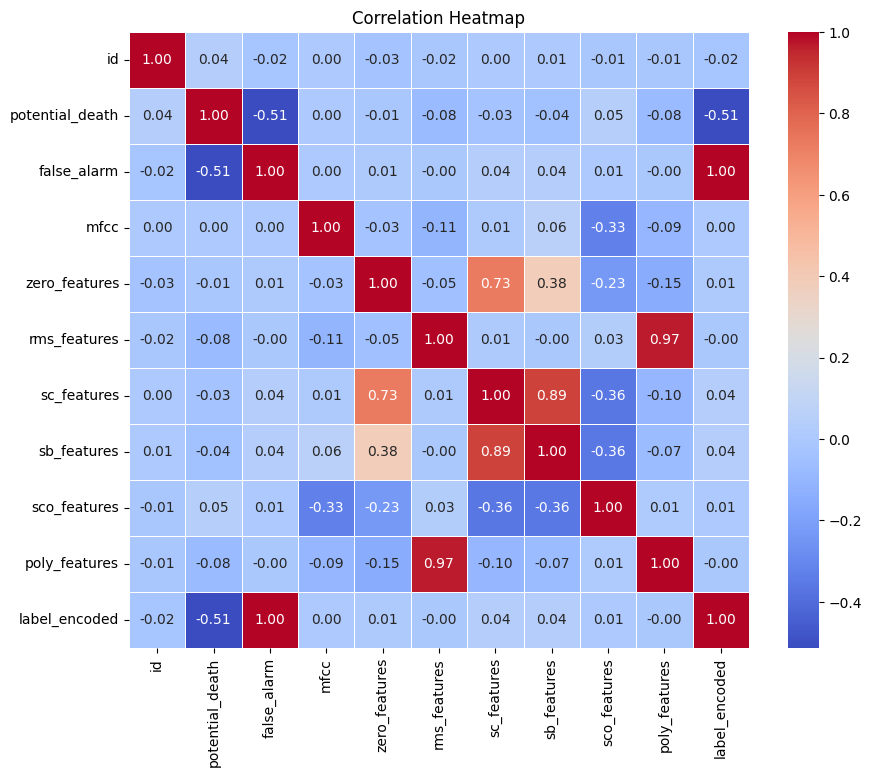

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']], df['label_encoded'], test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9645390070921985


In [ ]:
df

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features,label_encoded
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08,0
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08,0
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08,0
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08,1
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,739,call_739.mp3,Prank call,California,0.0,1,prank,-0.712818,0.079063,0.086251,1107.250832,770.760117,18.376661,6.270504e-08,1
701,740,call_740.mp3,Call from murder suspect,California,1.0,0,genuine,-2.112699,0.126717,0.059933,1463.262078,956.732241,16.020690,4.370230e-08,0
702,741,call_741.mp3,Shoot-out,Georgia,1.0,0,genuine,0.761806,0.076336,0.209283,1276.820975,1057.796477,17.024103,1.479537e-07,0
703,742,call_742.mp3,Murders,Arizona,1.0,0,genuine,-0.173448,0.110412,0.151108,1357.560494,903.475805,15.772393,1.230941e-07,0


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/EDA_DPA/Features/final_df.csv')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target labels (y)
X = df[['mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features', 'sco_features', 'poly_features']]
y = df['label']  # Replace 'target_column' with the actual column containing labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning model for temporal pattern analysis (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


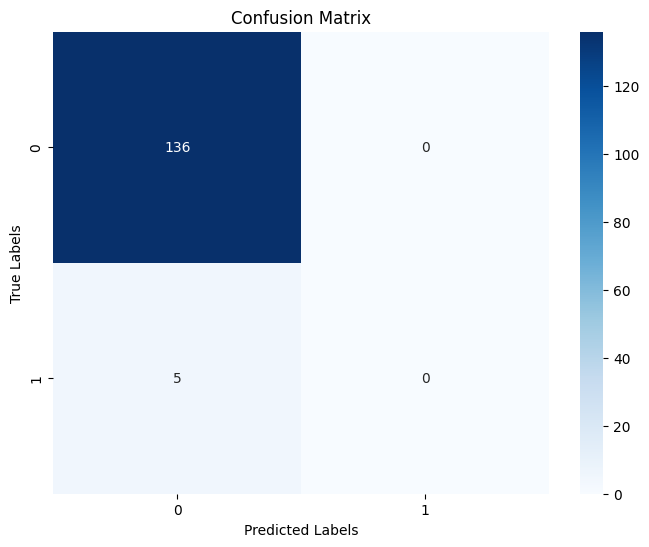

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

     genuine       0.96      1.00      0.98       136
       prank       0.00      0.00      0.00         5

    accuracy                           0.96       141
   macro avg       0.48      0.50      0.49       141
weighted avg       0.93      0.96      0.95       141



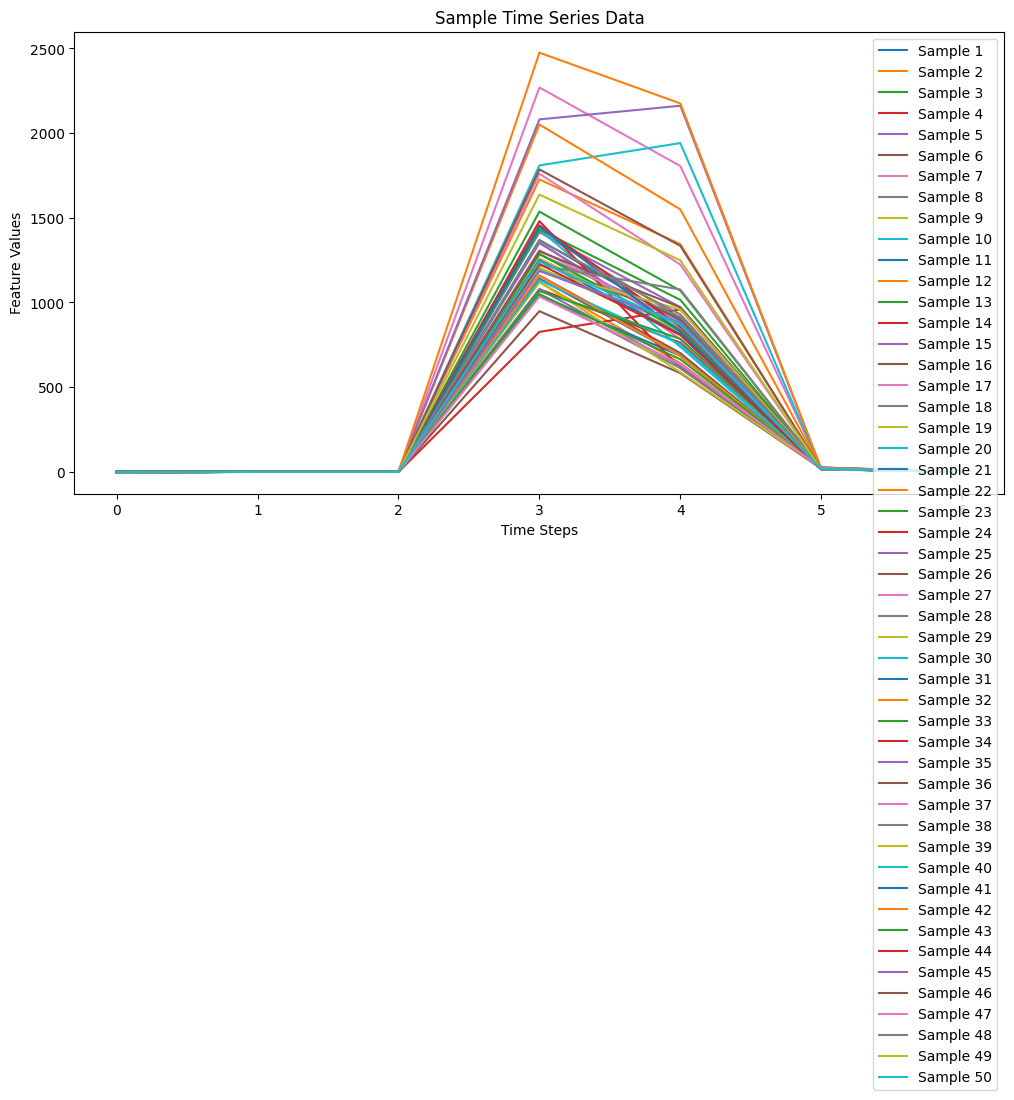

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming you have already trained your model and made predictions
# y_test and y_pred are your true labels and predicted labels, respectively

# Plot a confusion matrix to visualize classification performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualize a time series plot of some sample data points (e.g., first 50 data points)
sample_data = X_test.iloc[:50]  # Adjust the number of data points as needed
plt.figure(figsize=(12, 6))
for i in range(sample_data.shape[0]):
    plt.plot(range(len(sample_data.columns)), sample_data.iloc[i], label=f'Sample {i+1}')
plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.title('Sample Time Series Data')
plt.show()


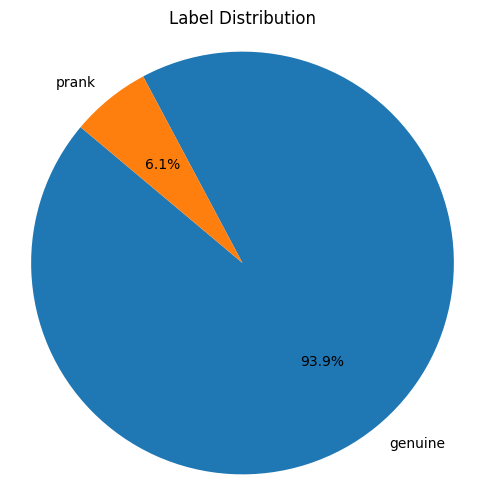

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'label' column

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

plt.title("Label Distribution")
plt.show()

In [ ]:
df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features,label_encoded
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08,0
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08,0
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08,0
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08,1
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "/content/drive/MyDrive/EDA_DPA/Features/final_df.csv"
df = pd.read_csv(file_path)

# Split the data into features (X) and the target labels (y)
X = df[['mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features', 'sco_features', 'poly_features']]
y = df['label']

# Split the data into training and testing sets with balanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     genuine       0.94      1.00      0.97       132
       prank       0.00      0.00      0.00         9

    accuracy                           0.94       141
   macro avg       0.47      0.50      0.48       141
weighted avg       0.88      0.94      0.91       141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


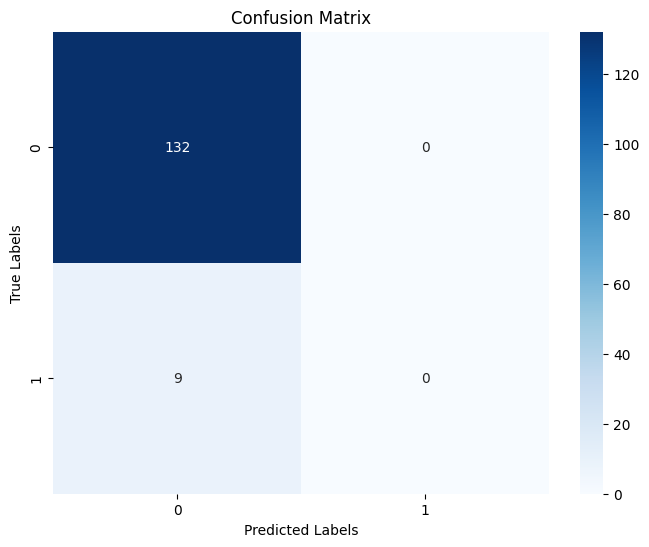

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load your dataset (replace 'your_data.csv' with the actual filename)
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Assuming 'mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features',
# 'sco_features', and 'poly_features' are the features you want to use for anomaly detection

# Select the features you want to use for anomaly detection
X = data[['mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features', 'sco_features', 'poly_features']]

# Create an Isolation Forest model
clf = IsolationForest(contamination=0.07, random_state=42)  # Adjust the contamination parameter based on the expected anomaly rate (e.g., 0.07 for 7%)

# Fit the model to the data
clf.fit(X)

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = clf.predict(X)

# Add the anomaly predictions to the original dataset
data['anomaly'] = predictions

# Display or save the dataset with anomaly predictions
print(data)


      id     file_name                             title       state  \
0      1    call_1.mp3      North Hollywood bank robbery  California   
1      2    call_2.mp3  Detroit Child’s 911 Call – audio    Michigan   
2      8    call_8.mp3            Girl’s Murder 911 Call     Florida   
3      9    call_9.mp3             ‘Shoot Her?’ 911 call       Texas   
4     10   call_10.mp3                Snowstorm 911 Call    Nebraska   
..   ...           ...                               ...         ...   
700  739  call_739.mp3                        Prank call  California   
701  740  call_740.mp3          Call from murder suspect  California   
702  741  call_741.mp3                         Shoot-out     Georgia   
703  742  call_742.mp3                           Murders     Arizona   
704  743  call_743.mp3                   Moose vs. child    Colorado   

     potential_death  false_alarm    label      mfcc  zero_features  \
0                1.0            0  genuine  2.774348       0.092

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
data.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features,label_encoded,anomaly
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08,0,1
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08,0,-1
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08,0,1
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08,1,1
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08,0,1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies:
      id     file_name                             title           state  \
1      2    call_2.mp3  Detroit Child’s 911 Call – audio        Michigan   
44    58   call_58.mp3              CPR by phone – Tenn.       Tennessee   
50    64   call_64.mp3               Taxi murders – Tex.           Texas   
57    71   call_71.mp3        Accidental shooting – Fla.         Florida   
68    82   call_82.mp3               Shooting at officer            Ohio   
91   105  call_105.mp3                  Snowstorm rescue       Wisconsin   
108  122  call_122.mp3                        Fatal fire            Iowa   
113  127  call_127.mp3                        Arson fire            Utah   
133  147  call_147.mp3                          CPR Call        Oklahoma   
151  165  call_165.mp3                  Helicopter crash      New Jersey   
162  176  call_176.mp3                Multiple shootings      California   
166  180  call_180.mp3                    Murder-suicide        New York   
1

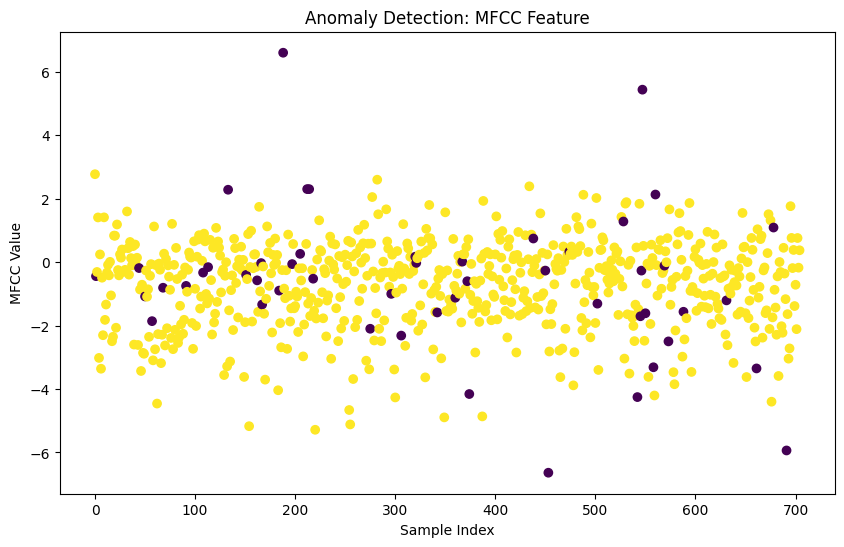

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load your dataset (replace 'your_data.csv' with the actual filename)
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Assuming 'mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features',
# 'sco_features', and 'poly_features' are the features you want to use for anomaly detection

# Select the features you want to use for anomaly detection
X = data[['mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features', 'sco_features', 'poly_features']]

# Create an Isolation Forest model
clf = IsolationForest(contamination=0.07, random_state=42)  # Adjust the contamination parameter based on the expected anomaly rate

# Fit the model to the data
clf.fit(X)

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = clf.predict(X)

# Add the anomaly predictions to the original dataset
data['anomaly'] = predictions

# Interpretation and Visualization
anomalies = data[data['anomaly'] == -1]

# Examine the anomalies and their context
print("Anomalies:")
print(anomalies)

# Create a scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X['mfcc'], c=predictions, cmap='viridis')
plt.title('Anomaly Detection: MFCC Feature')
plt.xlabel('Sample Index')
plt.ylabel('MFCC Value')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Average Precision: 1.00


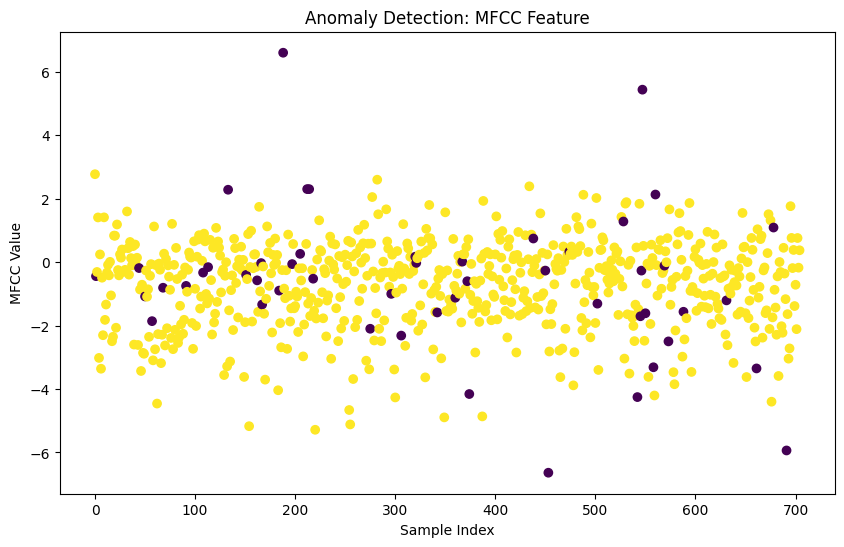

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_data.csv' with the actual filename)
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Assuming 'mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features',
# 'sco_features', and 'poly_features' are the features you want to use for anomaly detection

# Select the features you want to use for anomaly detection
X = data[['mfcc', 'zero_features', 'rms_features', 'sc_features', 'sb_features', 'sco_features', 'poly_features']]

# Create an Isolation Forest model
clf = IsolationForest(contamination=0.07, random_state=42)  # Adjust the contamination parameter based on the expected anomaly rate

# Fit the model to the data
clf.fit(X)

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = clf.predict(X)

# Add the anomaly predictions to the original dataset
data['anomaly'] = predictions

# Evaluate the model using precision, recall, and F1-score
precision = precision_score(data['anomaly'], predictions, pos_label=-1)
recall = recall_score(data['anomaly'], predictions, pos_label=-1)
f1 = f1_score(data['anomaly'], predictions, pos_label=-1)

# Calculate the average precision score (AUC-PR)
average_precision = average_precision_score(data['anomaly'], predictions)

# Print the evaluation metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("Average Precision: {:.2f}".format(average_precision))

# Create a scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X.index, X['mfcc'], c=predictions, cmap='viridis')
plt.title('Anomaly Detection: MFCC Feature')
plt.xlabel('Sample Index')
plt.ylabel('MFCC Value')
plt.show()


In [ ]:
df.head()

,id,file_name,title,state,potential_death,false_alarm,label,mfcc,zero_features,rms_features,sc_features,sb_features,sco_features,poly_features,label_encoded
0,1,call_1.mp3,North Hollywood bank robbery,California,1.0,0,genuine,2.774348,0.092506,0.091813,1122.137194,677.490571,25.617403,5.594756e-08,0
1,2,call_2.mp3,Detroit Child’s 911 Call – audio,Michigan,1.0,0,genuine,-0.440783,0.054411,0.130535,964.729144,1204.438309,24.651852,8.763465e-08,0
2,8,call_8.mp3,Girl’s Murder 911 Call,Florida,1.0,0,genuine,-0.309315,0.096928,0.104655,1355.358563,998.274181,15.986540,8.346468e-08,0
3,9,call_9.mp3,‘Shoot Her?’ 911 call,Texas,0.0,1,prank,1.410773,0.133110,0.028446,1532.378746,973.842686,17.838456,1.977618e-08,1
4,10,call_10.mp3,Snowstorm 911 Call,Nebraska,1.0,0,genuine,-3.020124,0.099188,0.081536,1110.698747,655.058693,23.605374,5.963549e-08,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Split data into features and labels
X = data[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']]  # Features
y = data['label_encoded']  # Labels (1 for prank, 0 for not prank)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select top k features
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Initialize and train a simpler classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9645390070921985
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[136   0]
 [  5   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install imbalanced-learn scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Split data into features and labels
X = data[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']]  # Features
y = data['label_encoded']  # Labels (1 for prank, 0 for not prank)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select top k features
X = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing the dataset with oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and train a classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.950354609929078
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[134   2]
 [  5   0]]


In [ ]:
pip install xgboost


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Split data into features and labels
X = data[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']]  # Features
y = data['label_encoded']  # Labels (1 for prank, 0 for not prank)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select top k features
X = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing the dataset with oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and train a classification model (XGBoost)
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9148936170212766
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[129   7]
 [  5   0]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Split data into features and labels
X = data[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']]  # Features
y = data['label_encoded']  # Labels (1 for prank, 0 for not prank)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select top k features
X = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation with SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a classification model (XGBoost)
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.851063829787234
Precision: 0.05555555555555555
Recall: 0.2
F1 Score: 0.08695652173913045
Confusion Matrix:
[[119  17]
 [  4   1]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Split data into features and labels
X = data[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']]  # Features
y = data['label_encoded']  # Labels (1 for prank, 0 for not prank)


# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select top k features
X = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation with SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (experiment with different values)
threshold = 0.5  # You can change this threshold as needed
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8297872340425532
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[117  19]
 [  5   0]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EDA_DPA/Features/final_df.csv")

# Split data into features and labels
X = data[['mfcc', 'zero_features', 'rms_features','sc_features','sb_features','sco_features','poly_features']]  # Features
y = data['label_encoded']  # Labels (1 for prank, 0 for not prank)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Select top k features
X = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation with SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a classification model (XGBoost)
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (experiment with different values)
threshold = 0.3  # You can change this threshold as needed
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7659574468085106
Precision: 0.03333333333333333
Recall: 0.2
F1 Score: 0.05714285714285715
Confusion Matrix:
[[107  29]
 [  4   1]]
